## Logistic Regression - Titanic

The titanic dataset is a popular dummy dataset used to learn about logistic regression. It has also been used in a [Kaggle data science competition](https://www.kaggle.com/c/titanic), so you'll also find blogposts exploring all kinds of more advanced concepts that use this dataset too! In this assignment, you'll do a logistic regression to look at the effect of sex and class on survival on the titanic, by computing odds ratios.

adapted from: https://github.com/jstray/lede-algorithms/blob/master/week-3/week-3-2-homework.ipynb

Some references:

- [What are odds vs. probability?](https://towcenter.gitbooks.io/curious-journalist-s-guide-to-data/content/analysis/counting_possible_worlds.html)
- [Investigate.ai on Logistic Regressions](https://investigate.ai/regression/logistic-regression-quickstart/)
- [StatQuest Logistic Regressions Playlist](https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe)
- [How do I interpret odds ratios in logistic regression?](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/) This one's a little more technical, but has good examples.


In [1]:
import pandas as pd
import numpy as np 
from plotnine import *

### Load the data

Read in the `titanic.csv` data set again.

In [2]:
# Load titanic.csv
df = pd.read_csv('titanic.csv')
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...
1308,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


The first thing we need to do is code the pclass and gender variables numerically. Let's use the following scheme:
- pclass: 1,2,3
- gender: 0=male, 1=female, and let's call the column called "female" to remind us which is which

In [3]:
# recode the pclass and gender variables so they are numeric
df['pclass'] = df.pclass.replace({'1st': 1, '2nd': 2, '3rd': 3})
df['female'] = df.gender.replace({'male': 0, 'female': 1})
df.head(3)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female
0,1,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1
1,1,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0


### 1. Exploratory data analysis

In [4]:
df.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0


In [5]:
# First, let's do some descriptive stats
# 
# How many men and women are travelling on the titanic?
# How many people are travelling in each class?
# What share of each survived?
piv = df.pivot_table(index='survived', columns='female', aggfunc='count', values='name')
display(piv)

pct_survived = piv.apply(lambda x: x/sum(x)).round(2)
display(pct_survived)

female,0,1
survived,,
0,708,156
1,142,307


female,0,1
survived,,
0,0.83,0.34
1,0.17,0.66


In [6]:
piv = df.pivot_table(index='survived', columns='pclass', aggfunc='count', values='name')
display(piv)

pct_survived = piv.apply(lambda x: x/sum(x)).round(2)
display(pct_survived)

pclass,1,2,3
survived,,,
0,129,161,574
1,193,119,137


pclass,1,2,3
survived,,,
0,0.4,0.57,0.81
1,0.6,0.42,0.19


In [7]:
pd.crosstab(df.female, df. survived, normalize = 'index')

survived,0,1
female,,
0,0.832941,0.167059
1,0.336933,0.663067


In [8]:
pd.crosstab(df.female, df. survived, normalize = 'columns')

survived,0,1
female,,
0,0.819444,0.316258
1,0.180556,0.683742


### 2. Logistic regression with one variable at a time

First, do a logistic regression of the `female` variable alone to predict the probability of survival. Below is some code that will help you plot the result.

In [9]:
# Step 1: Run a logistic regression on one variable and see the summary of the output

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression


import statsmodels.formula.api as smf

model = smf.logit("survived ~ female", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.517411
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.1945
Time:                        15:48:36   Log-Likelihood:                -679.36
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                 2.572e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6066      0.092    -17.473      0.000      -1.787      -1.426
female         2.2836      0.135     16.963      0.000       2.020       2.547
==============================================================================
"""

In [10]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions

df["female_predictions"] = results.predict()
df.head()



,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,female_predictions
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.167059
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.167059


In [11]:
df.sort_values("female_predictions", ascending=False).head()


,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,female_predictions
0,1,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067
780,3,1,"Drapkin, Miss Jennie",23.0,Southampton,"London New York, NY",NaN,NaN,NaN,female,1,0.663067
589,2,1,"West, Mrs Edwy Arthur (Ada Mary)",33.0,Southampton,"Bournmouth, England",NaN,NaN,NaN,female,1,0.663067
594,2,1,"Wilkinson, Mrs Elizabeth Anne",NaN,Southampton,"Manchester, England",NaN,NaN,NaN,female,1,0.663067
596,2,1,"Wright, Miss Marion",26.0,Southampton,"Yoevil, England / Cottage Grove, OR",NaN,NaN,9,female,1,0.663067


In [12]:
# Step 3: What is the odds ratio of on the gender variable alone?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs



,coef,odds ratio,pvalue,name
Intercept,-1.606617,0.200565,2.306853e-68,Intercept
female,2.283609,9.812026,1.529597e-64,female


In [13]:
df.female_predictions.unique()

array([0.66306695, 0.16705882])

Now, try the same thing but with the `pclass` variable

In [14]:
# Step 1: Run a logistic regression on one variable and see the summary of the output

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression



model = smf.logit("survived ~ pclass", data=df)
results = model.fit()
results.summary()




Optimization terminated successfully.
         Current function value: 0.576759
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.1021
Time:                        15:48:36   Log-Likelihood:                -757.28
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                 2.459e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3996      0.170      8.236      0.000       1.067       1.733
pclass        -0.9285      0.074    -12.611      0.000      -1.073      -0.784
==============================================================================
"""

In [15]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions


df["pclass_predictions"] = results.predict()
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,female_predictions,pclass_predictions
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067,0.615642
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.167059,0.615642
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.167059,0.615642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,3,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052
1309,3,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052
1310,3,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052
1311,3,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,1,0.663067,0.200052


In [16]:
# Step 3: What is the odds ratio of on the pclass variable alone?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs


,coef,odds ratio,pvalue,name
Intercept,1.399625,4.053680,1.778696e-16,Intercept
pclass,-0.928532,0.395133,1.832570e-36,pclass


**Bonus** 🤖 - Writing clean/DRY code

DRY stands for "Don't Repeat Yourself". This is a good principle of writing clean code. Instead of copy/pasting code multiple times (which can lead to errors if you fix one copy but not the other), you can write DRY code by wrapping any chunk of code you plan to repeat in a function. As a bonus on this section, re-write the code above as a function and run that function once on `female` and once on `pclass`.

### 3. Looking at two variables at a time

We know from the earlier assignment that class also affects survival, so let's add that to our model. Compute a logistic regression on the variables `pclass` and `female`.

In [17]:
# Logistic regression on two variables

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression

import statsmodels.formula.api as smf

model = smf.logit("survived ~ female + pclass", data=df)
results = model.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.457739
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1310
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.2874
Time:                        15:48:37   Log-Likelihood:                -601.01
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                5.504e-106
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6210      0.196      3.173      0.002       0.237       1.005
female         2.4285      0.151     16.117      0.000       2.133       2.724
pclass        -1.0373      0.088    -11.787      0.000      -1.210      -0.865
==============================================================================
"""

In [18]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions
df['multi_predic'] = results.predict()
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,female_predictions,pclass_predictions,multi_predic
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067,0.615642,0.882065
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642,0.882065
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.167059,0.615642,0.397390
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642,0.882065
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.167059,0.615642,0.397390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,3,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494
1309,3,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494
1310,3,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494
1311,3,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,1,0.663067,0.200052,0.484385


In [19]:
# Step 3: What is the odds ratio of on the gender variable?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs

,coef,odds ratio,pvalue,name
Intercept,0.620955,1.860705,1.510011e-03,Intercept
female,2.428483,11.341669,1.949881e-58,female
pclass,-1.037306,0.354408,4.556499e-32,pclass


### 4. What does this mean

What is the odds ratio on the `pclass` variable? What happens to the odds of survival when we move from 1st to 2nd or from 2nd to 3rd class?


👉 Odds ratio is 0.35. When a passenger move from the 1st class to 2nd class, your odds of survial will decrease roughly 1/3.

### 5. Bonus - Age

Does the age of a passenger impact their chances of survival?

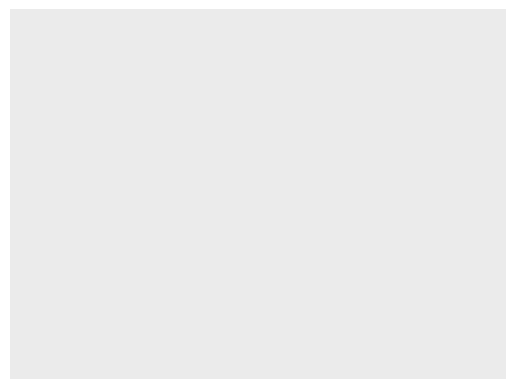

<ggplot: (143802064704)>

In [20]:
# plot hitsgram
(

ggplot(df)


)

In [21]:
model = smf.logit("survived ~ female + pclass + age", data=df[df.age.isna()==False])
results = model.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.426398
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.3792
Time:                        15:48:37   Log-Likelihood:                -269.91
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                 3.662e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8188      0.502      5.620      0.000       1.836       3.802
female         3.0862      0.241     12.790      0.000       2.613       3.559
pclass        -1.4224      0.170     -8.387      0.000      -1.755      -1.090
age           -0.0489      0.009     -5.673      0.000      -0.066      -0.032
==============================================================================
"""

In [23]:
df2 = df[df.age.isna()==False]

In [24]:
df2['age_predic'] = results.predict()
df2

C:\Users\nao22\AppData\Local\Temp/ipykernel_25736/1927423032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,female_predictions,pclass_predictions,multi_predic,age_predic
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067,0.615642,0.882065,0.955445
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642,0.882065,0.987689
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.167059,0.615642,0.397390,0.482606
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067,0.615642,0.882065,0.963063
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.167059,0.615642,0.397390,0.794392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3,0,"Gronnestad, Mr Daniel Danielsen",32.0000,Southampton,"Foresvik, Norway Portland, ND",NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494,0.046880
835,3,0,"Gustafsson, Mr Alfred Ossian",20.0000,Southampton,"Waukegan, Chicago, IL",NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494,0.081231
836,3,0,"Gustafsson, Mr Anders Vilhelm",37.0000,Southampton,"Ruotsinphytaa, Finland New York, NY",NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494,0.037095
837,3,0,"Gustafsson, Mr Johan Birger",28.0000,Southampton,"Ruotsinphytaa, Finland New York, NY",NaN,NaN,NaN,male,0,0.167059,0.200052,0.076494,0.056430


In [25]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs

,coef,odds ratio,pvalue,name
Intercept,2.818805,16.756822,1.907179e-08,Intercept
female,3.086188,21.893452,1.860397e-37,female
pclass,-1.422401,0.241134,4.998668e-17,pclass
age,-0.048867,0.952308,1.403173e-08,age


The odds of survival for a passenger on the Titanic were twenty-two times higher if they were female, even after controlling for passenger class and age. When considering the three factors, age does not affect the odds of survival. 